## Importing Libraries 

In [37]:
import numpy as np 
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind, chi2_contingency, shapiro
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import kstest, norm

## Getting the data

Here in the data, Loan status is our target variable and others are features 

In [6]:
data = pd.read_csv('/Users/Antara/Documents/scalar/09_Feature_Engineering_1/loan.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Basic Exploration 

In [7]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


From the above info data we saw that Dependant column is 'object' but it should be number. Lets try to investigate more on that

In [9]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

We can notice from above that there is '3+' which is making entire column as 'object'

In [11]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


from the above data we can see that mean of credit history is 0.842199 which means that 84.2% people in the data have credit history 

Lets try to find the missing values 

In [14]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
data.isna().sum()/data.shape[0]*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

Let us now seperate categorical columns and numerical columns 

In [16]:
cat_cols = data.dtypes == 'object'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [17]:
cat_cols.remove("Loan_Status")
cat_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

## Univariate Analysis 

Target variable = Loan status 

In [20]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: xlabel='Loan_Status', ylabel='count'>

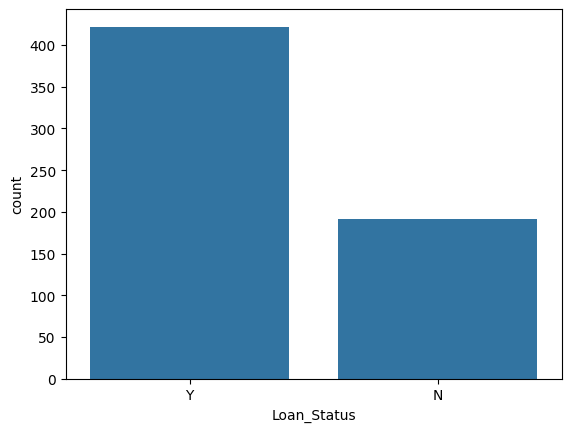

In [18]:
sns.countplot(data= data, x = "Loan_Status")

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

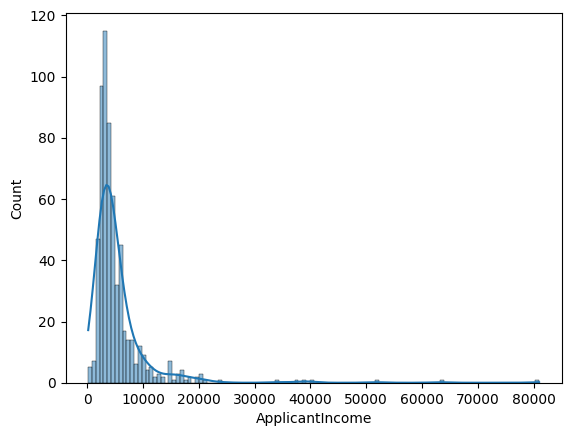

In [21]:
sns.histplot(data= data, x = "ApplicantIncome", kde = True)

<Axes: xlabel='ApplicantIncome'>

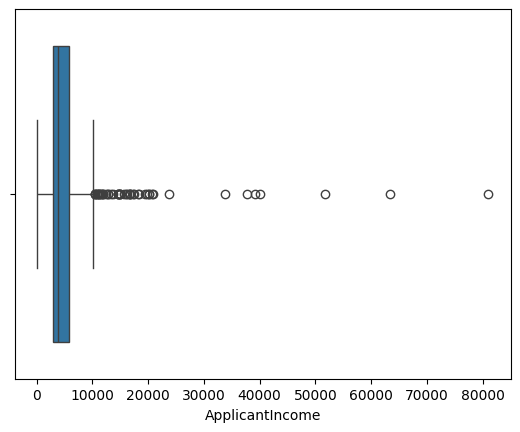

In [24]:
sns.boxplot(data= data, x = "ApplicantIncome")

### We are checking if the distribution is normal or not

checking with qqplot

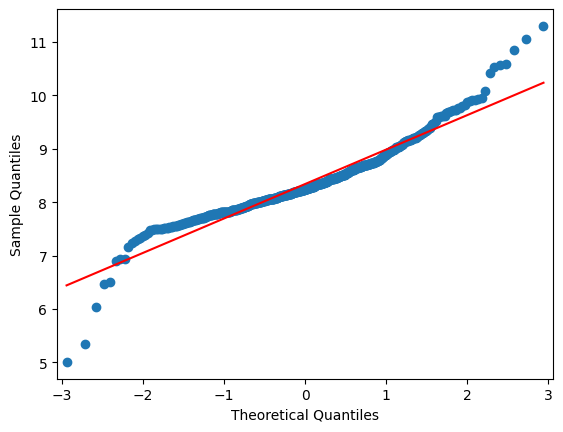

In [27]:
qqplot(np.log(data["ApplicantIncome"]), line= "s")
plt.show()


checking using Shapiro test

In [28]:
shapiro(np.log(data["ApplicantIncome"]))

ShapiroResult(statistic=0.935165394990309, pvalue=1.1198134091840294e-15)

When we used qqplot (graph does not show normal distribution) and Shapiro (p value < 0.05) test we confirmed that the data is not normally distributed. 

Let us check using KS Test also
Ho = the distribution is Gaussian 
Ha = It is not Gaussian 

In [35]:
Log_ApplicationIncome = np.log(data["ApplicantIncome"])
print(Log_ApplicationIncome)
z_values_ApplicantIncome = Log_ApplicationIncome - Log_ApplicationIncome.mean()/ Log_ApplicationIncome.std()
print(z_values_ApplicantIncome)


0      8.674026
1      8.430109
2      8.006368
3      7.856707
4      8.699515
         ...   
609    7.972466
610    8.320205
611    8.996157
612    8.933664
613    8.430109
Name: ApplicantIncome, Length: 614, dtype: float64
0     -4.252812
1     -4.496729
2     -4.920471
3     -5.070132
4     -4.227324
         ...   
609   -4.954372
610   -4.606634
611   -3.930682
612   -3.993174
613   -4.496729
Name: ApplicantIncome, Length: 614, dtype: float64


In [38]:
kstest(z_values_ApplicantIncome, norm.cdf)

KstestResult(statistic=0.9864083745080789, pvalue=0.0, statistic_location=-2.8492714187042907, statistic_sign=1)

looking at the pvalue above we can say that we reject the null hypothesis 